# Домашнее задание "Центральная предельная теорема и статистика".

## Задание.

В этом задании нужно убедиться, что ЦПТ действительно работает.

Создайте случайную величину из [любого выбранного вами распределения](https://docs.scipy.org/doc/scipy/reference/stats.html), для разных значений `n` сгенерируйте 1000 выборок размера `n`. Постройте гистрограммы средних этих выборок и сделайте выводы.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [37]:
rv = sts.expon(loc=0, scale=0.5)
sample = rv.rvs(size=1000)

In [128]:
rv

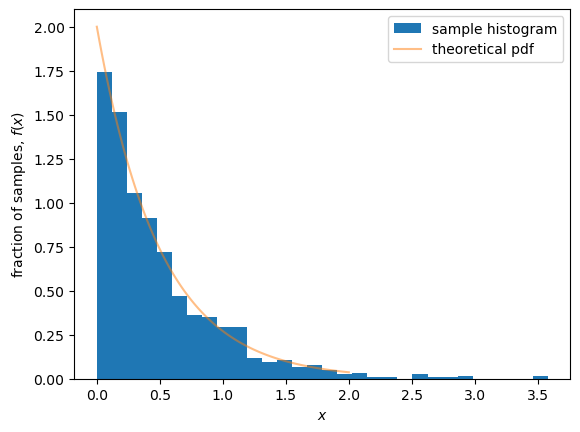

In [38]:
x = np.linspace(0,2,100)
pdf = rv.pdf(x)
plt.hist(sample, density=True, bins=30, label='sample histogram')
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()

In [131]:
n1 = 2                # Размеры выборок 
n2 = 10

a1 = np.array([])     # Массивы для сохранения средних по выборкам
a2 = np.array([])

samples_count = 1000  # Количество повторов генерации

for number in range(samples_count): 
    sample1 = rv.rvs(size=n1)               # На каждом цикле генерируем выборки указанных размеров
    sample2 = rv.rvs(size=n2)
    a1 = np.append(a1, sample1.mean())      # Считаем среднее по каждой выборке и добавляем в массив средних
    a2 = np.append(a2, sample2.mean()) 

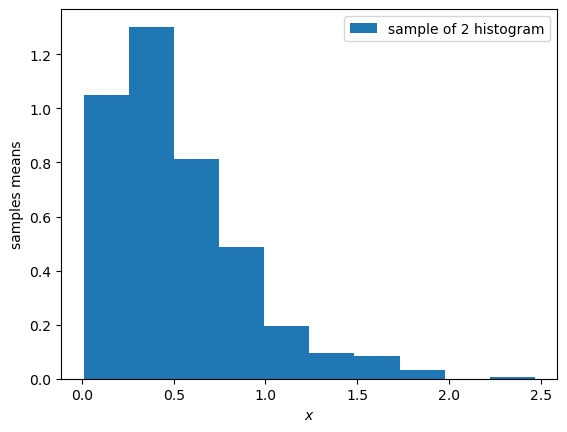

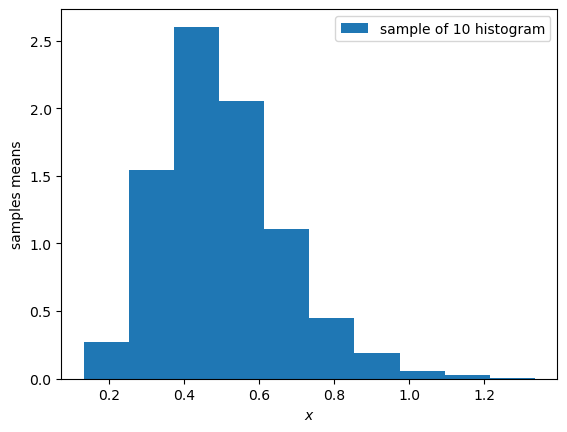

In [133]:
label_1 = 'sample of ' + str(n1) + ' histogram'   # Подписи для графиков
plt.hist(a1, density=True, label=label_1)         # Строим графики

plt.legend() 
plt.ylabel('samples means')
plt.xlabel('$x$')
plt.show()

label_2 = 'sample of ' + str(n2) + ' histogram' 
plt.hist(a2, density=True, label=label_2)

plt.legend() 
plt.ylabel('samples means')
plt.xlabel('$x$')
plt.show()

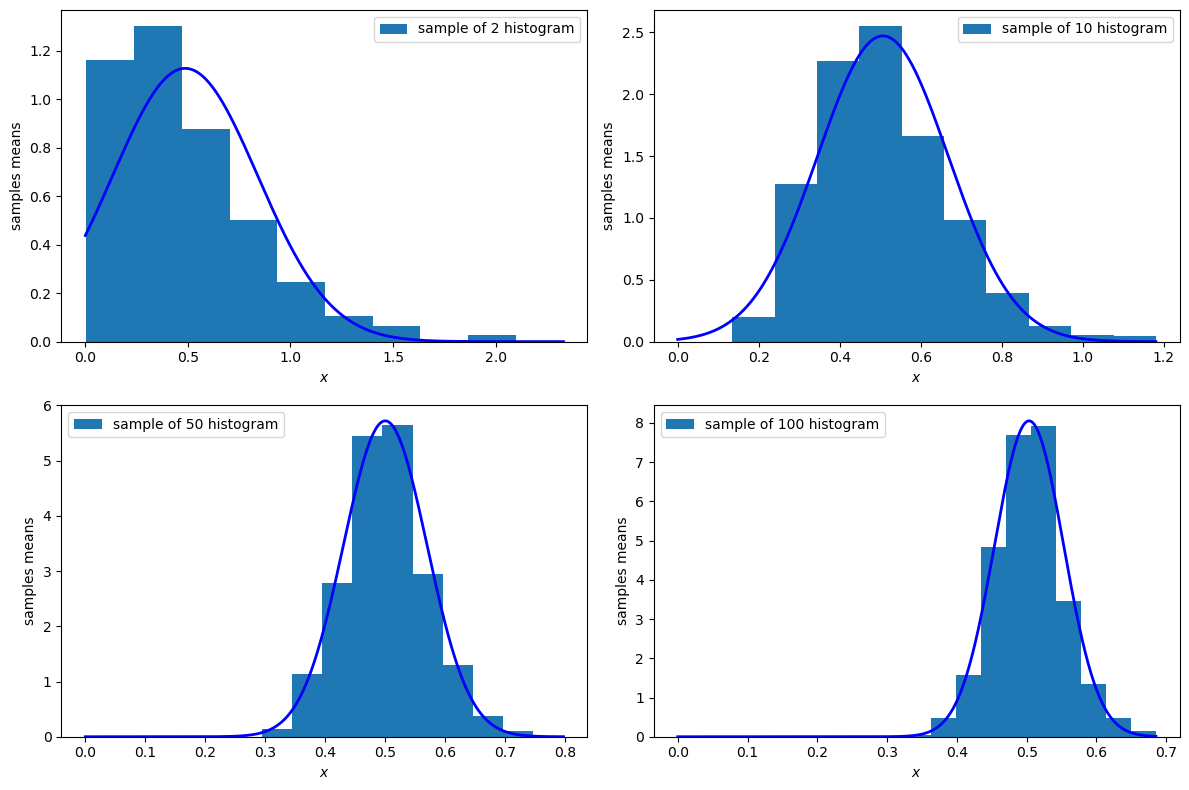

In [154]:
# Размеры выборок
n_sizes = [2, 10, 50, 100]

# Массив для сохранения средних по выборкам
a = []

# # Количество повторов генерации
samples_count = 1000

plt.figure(figsize=(12, 8))
   
for i, n in enumerate(n_sizes):
    a_ = np.array([])
    for number in range(samples_count):
        # На каждом цикле генерируем выборки указанных размеров
        sample = rv.rvs(size=n) 
        # Считаем среднее по каждой выборке и добавляем в массив средних
        a_ = np.append(a_, sample.mean()) 
    a.append(a_)

    
    plt.subplot(2, 2, i + 1) 
    # Подписи для графиков
    label = 'sample of ' + str(n) + ' histogram'
    # Строим графики
    plt.hist(a[i], density=True, label=label)         

    plt.legend() 
    plt.ylabel('samples means')
    plt.xlabel('$x$')
    
    # Построим график нормального распределения
    m = np.mean(a[i])
    sigma = np.std(a[i])
    x = np.linspace(0, max(a[i]), 1000)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, color='blue', linewidth=2)

    
plt.tight_layout()
plt.show()

### При увеличении числа выборки гистограмма средних показателей (для каждых случайных 100 значений - как на последнем графике) - экспоненциальное распределение стремится к нормальному распределению. 